<a href="https://colab.research.google.com/github/munnazaza/Diabetes-prediction/blob/main/App_for_Diabetes_Prediction_using_SMOTE_technique_(applying_various_classifiers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = '/content/diabetes.xlsx'  # Update the path if necessary
diabetes = pd.read_excel(file_path)


In [8]:
# Display the first few rows of the dataset
print(diabetes.head())
print(diabetes.columns)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))
diabetes.groupby('Outcome').size()


Diabetes data set dimensions : (768, 9)


Outcome
0    500
1    268
dtype: int64

In [10]:
# Check class distribution in the Outcome column
class_distribution = diabetes['Outcome'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Calculate the percentage of the minority class
total_samples = len(diabetes)
minority_percentage = (class_distribution.min() / total_samples) * 100
print(f"Minority class percentage: {minority_percentage:.2f}%")

# Decision rule for applying SMOTE
if minority_percentage < 40:
    print("Significant class imbalance detected. Consider using SMOTE or similar techniques.")
else:
    print("Class balance is reasonable. SMOTE may not be necessary.")

Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
Minority class percentage: 34.90%
Significant class imbalance detected. Consider using SMOTE or similar techniques.


In [11]:
# List columns that contain implausible zero values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with the median of the respective column (excluding zeros)
for column in columns_with_zeros:
    median = diabetes[column][diabetes[column] != 0].median()
    diabetes[column] = diabetes[column].replace(0, median)

# Check the first few rows to confirm changes
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))
diabetes.groupby('Outcome').size()

Diabetes data set dimensions : (768, 9)


Outcome
0    500
1    268
dtype: int64

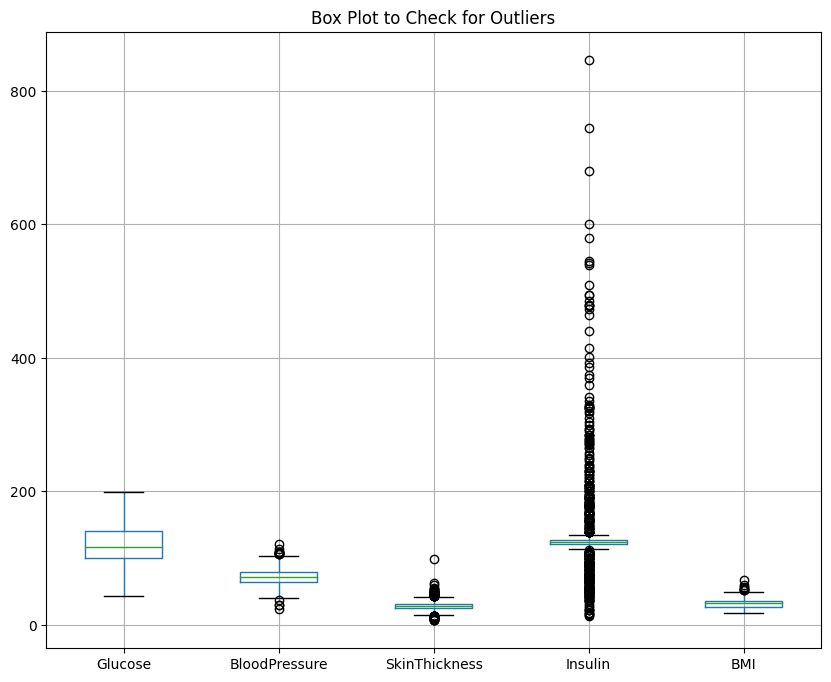

In [ ]:

# Plotting boxplots for visualizing outliers
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
plt.figure(figsize=(10, 8))
diabetes[features].boxplot()
plt.title('Box Plot to Check for Outliers')
plt.show()


From the box plot you've shared, we can observe the distribution of values across different variables in your diabetes dataset. Let's discuss each variable:

Glucose
Observation: The box plot for Glucose shows a few outliers on the higher side. These values are significantly higher than the main data cluster but aren’t extreme.
Implication: High glucose levels are a key indicator of diabetes, so these outliers may represent actual diabetic cases or cases at high risk. It's important to verify these values to ensure they are not errors before considering their removal.
Blood Pressure
Observation: The Blood Pressure box plot has some high outliers. The values generally cluster well within a typical range for adults.
Implication: Extremely high values could indicate measurement errors or cases with severe hypertension. Given the health implications, further investigation is necessary before deciding to remove these.
Skin Thickness
Observation: The distribution here seems compact with a few outliers. The Skin Thickness variable does not display extreme variability.
Implication: Since skin thickness is less commonly understood and less directly linked to diabetes than other measures like glucose, outliers here might be less impactful but should still be verified for errors.
Insulin
Observation: This variable shows a significant number of high outliers, with the data points stretching very far from the median, which suggests a high variance in insulin levels.
Implication: Insulin levels can vary widely in diabetic patients, especially those who are managing their condition with insulin shots. High outliers could represent cases with significant insulin resistance or those on aggressive insulin therapy. Careful consideration is required to decide whether these are natural variances or data errors.
BMI
Observation: BMI has a few outliers on the higher end, but the majority of data points fall within a normal range.
Implication: High BMI values can be risk factors for diabetes, and these outliers might represent individuals at high risk or with concurrent obesity issues. Confirming the validity of these data points is crucial.
General Recommendations:
Verification: Check if the outlier values are due to data entry errors or are valid measurements. This might involve cross-referencing other data sources or medical records.
Health Context: In medical datasets like this, outliers can often represent true health conditions that are crucial for predictive modeling. Removing them may reduce the predictive power of models for extreme cases.
Statistical Handling: If confirmed as errors or if deemed too extreme to be useful, consider methods like Winsorizing (capping the outliers at a certain percentile) rather than outright removal to preserve the underlying data structure.
Handling outliers requires balancing between cleaning data for better statistical analysis and preserving meaningful extreme values that could be significant in a medical context.








In [ ]:
print(diabetes.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

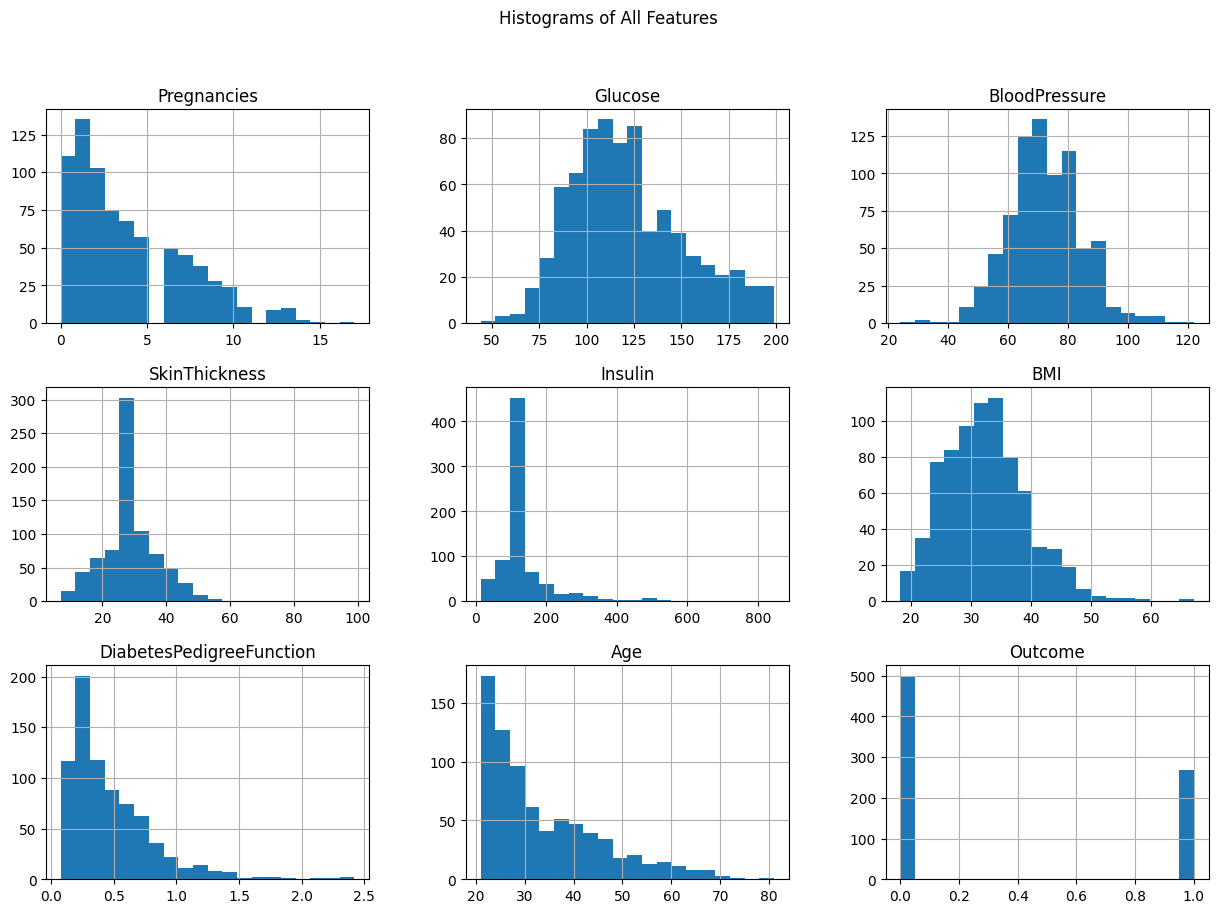

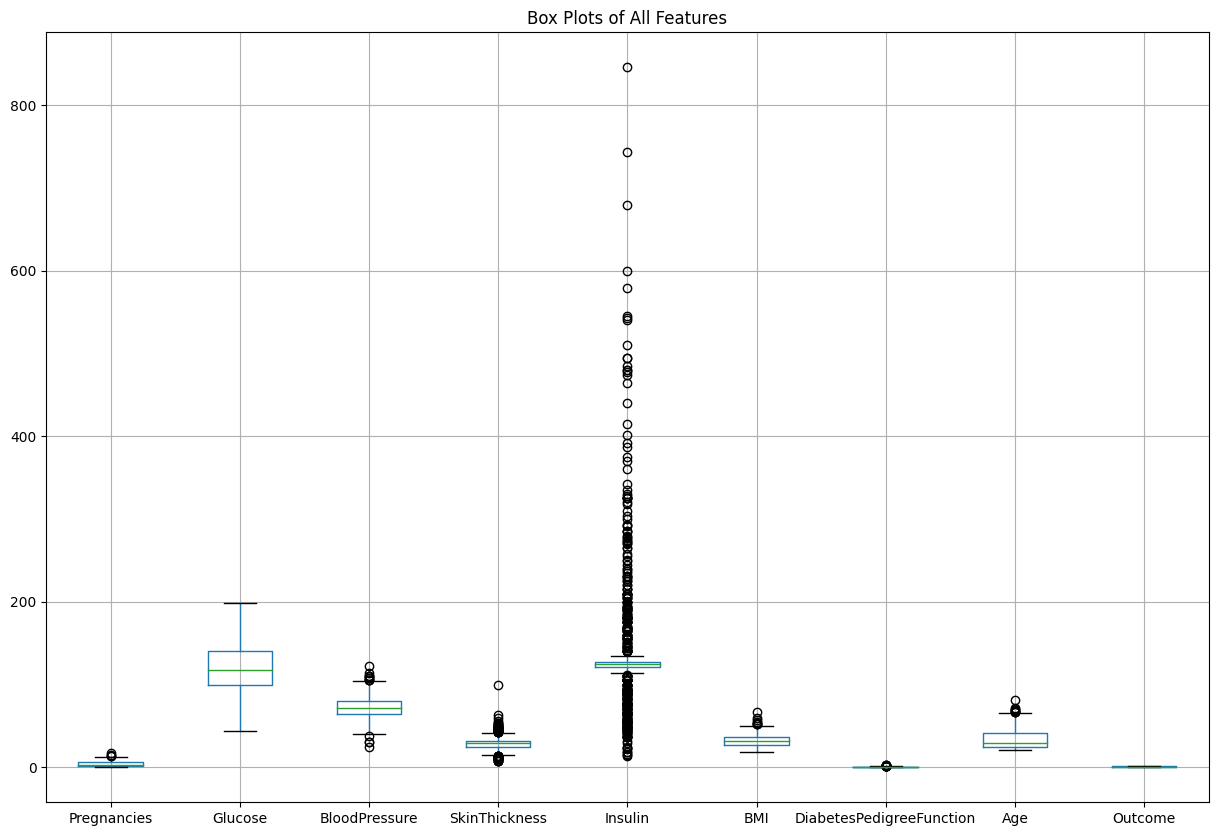

In [ ]:
import matplotlib.pyplot as plt

# Histograms for all numeric features
diabetes.hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of All Features')
plt.show()

# Box plots for all numeric features to identify outliers
diabetes.boxplot(figsize=(15, 10))
plt.title('Box Plots of All Features')
plt.show()


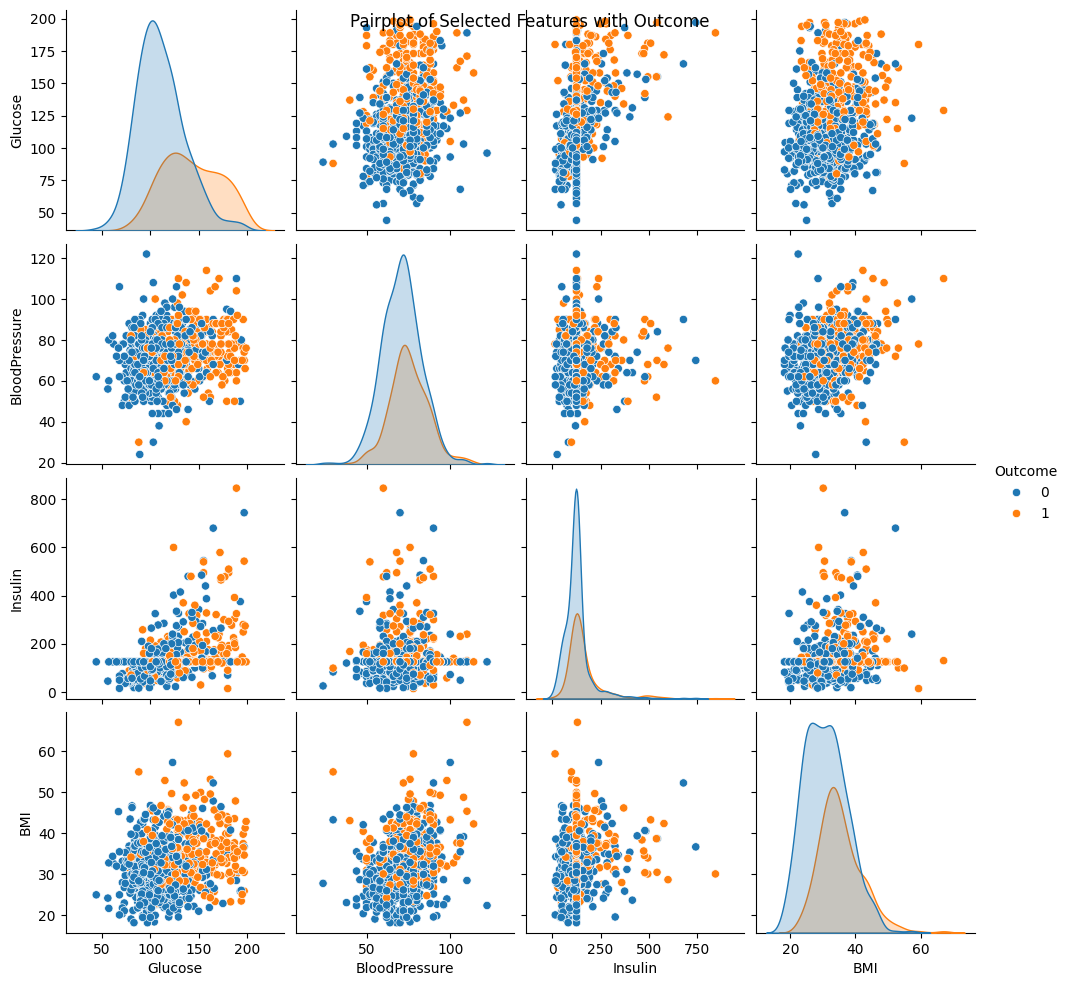

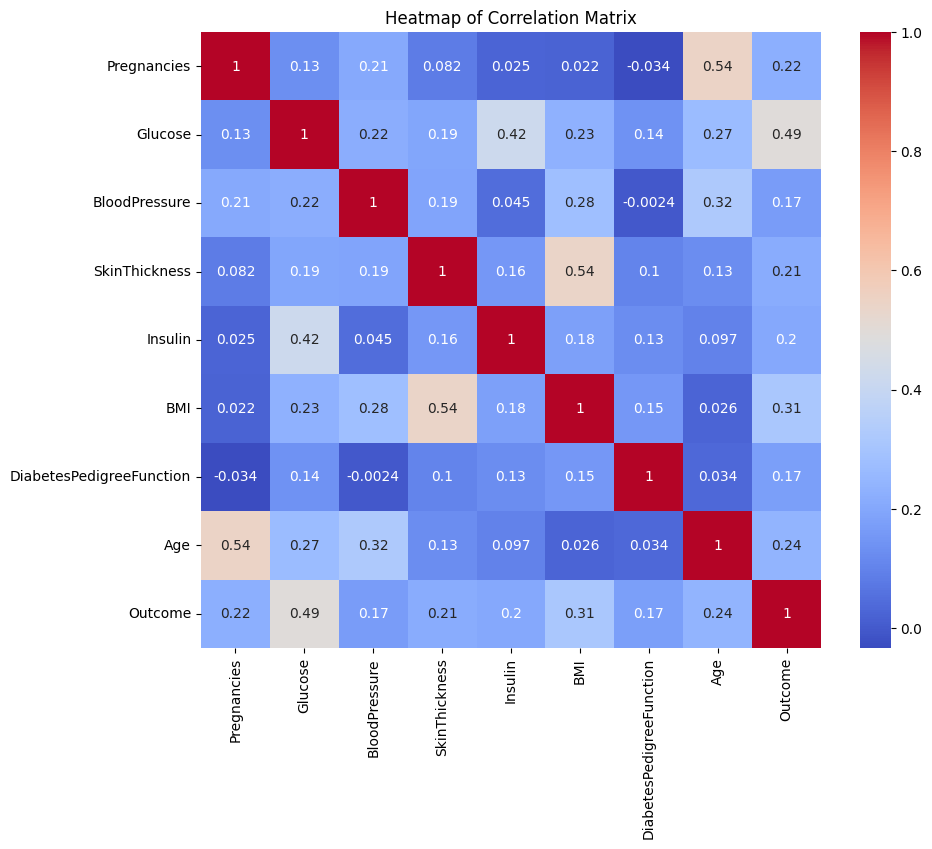

In [ ]:
import seaborn as sns

# Pairplot for selected features against the 'Outcome'
sns.pairplot(diabetes, hue='Outcome', vars=['Glucose', 'BloodPressure', 'Insulin', 'BMI'])
plt.suptitle('Pairplot of Selected Features with Outcome')
plt.show()

# Correlation matrix with heatmap
correlation_matrix = diabetes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()



In [14]:


# Data Preparation
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'LightGBM': LGBMClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    results[name] = {
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Display results
for name, result in results.items():
    print(f"Results for {name}:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\n" + "-"*60 + "\n")


[LightGBM] [Info] Number of positive: 401, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1130
[LightGBM] [Info] Number of data points in the train set: 802, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

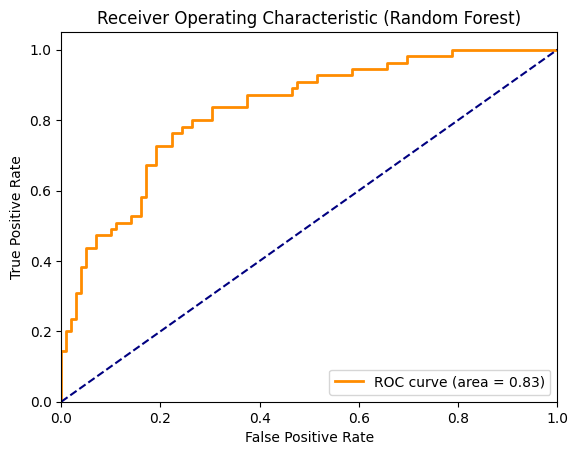

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_smote, y_train_smote, X_test, y_test are defined and Random Forest is trained
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42)
random_forest.fit(X_train_smote, y_train_smote)
y_scores = random_forest.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd

# Define the data for the table
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.74, 0.69, 0.75],
    'Precision Class 0': [0.80, 0.82, 0.81],
    'Precision Class 1': [0.64, 0.56, 0.64],
    'Recall Class 0': [0.80, 0.68, 0.79],
    'Recall Class 1': [0.64, 0.73, 0.67],
    'F1-Score Class 0': [0.80, 0.74, 0.80],
    'F1-Score Class 1': [0.64, 0.63, 0.65],
    'Macro Avg Precision': [0.72, 0.69, 0.73],
    'Macro Avg Recall': [0.72, 0.70, 0.73],
    'Macro Avg F1-Score': [0.72, 0.69, 0.73],
    'Weighted Avg Precision': [0.74, 0.72, 0.75],
    'Weighted Avg Recall': [0.74, 0.69, 0.75],
    'Weighted Avg F1-Score': [0.74, 0.70, 0.75]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
print(results_df)


                 Model  Accuracy  Precision Class 0  Precision Class 1  \
0  Logistic Regression      0.74               0.80               0.64   
1        Decision Tree      0.69               0.82               0.56   
2        Random Forest      0.75               0.81               0.64   

   Recall Class 0  Recall Class 1  F1-Score Class 0  F1-Score Class 1  \
0            0.80            0.64              0.80              0.64   
1            0.68            0.73              0.74              0.63   
2            0.79            0.67              0.80              0.65   

   Macro Avg Precision  Macro Avg Recall  Macro Avg F1-Score  \
0                 0.72              0.72                0.72   
1                 0.69              0.70                0.69   
2                 0.73              0.73                0.73   

   Weighted Avg Precision  Weighted Avg Recall  Weighted Avg F1-Score  
0                    0.74                 0.74                   0.74  
1        

In [18]:
import pickle
# Step 5: Save the Trained Model
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

# Print confirmation
print("Model trained and saved successfully!")

Model trained and saved successfully!


In [20]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [21]:
pip install streamlit scikit-learn numpy


In [22]:
# Save the provided Streamlit app code to app.py
app_code = """
import streamlit as st
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the trained model
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

# Load the scaler
scaler = StandardScaler()
X_sample = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Sample data for fitting the scaler
scaler.fit(X_sample)

# Main application
st.title("Diabetes Prediction")
st.write("Enter the following health metrics to predict the likelihood of diabetes:")

# Input fields for user to enter health metrics
pregnancies = st.number_input("Pregnancies:", min_value=0)
glucose = st.number_input("Glucose Level:", min_value=0)
blood_pressure = st.number_input("Blood Pressure:", min_value=0)
skin_thickness = st.number_input("Skin Thickness:", min_value=0)
insulin = st.number_input("Insulin Level:", min_value=0)
bmi = st.number_input("BMI:", min_value=0.0)
diabetes_pedigree = st.number_input("Diabetes Pedigree Function:", min_value=0.0)
age = st.number_input("Age:", min_value=0)

input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]])
input_data_scaled = scaler.transform(input_data)

if st.button("Predict"):
    prediction = model.predict(input_data_scaled)
    if prediction[0] == 0:
        st.write("The person is not diabetic.")
    else:
        st.write("The person is diabetic.")
"""

with open('app.py', 'w') as file:
    file.write(app_code)

print("app.py has been saved successfully.")


app.py has been saved successfully.


In [23]:
!pip install streamlit scikit-learn numpy pyngrok


In [25]:
!ngrok authtoken 2gqf851cg5AEXHC6GSBjaFrxXZP_69bivNyNDAx95qq7xmNHZ


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [26]:
from pyngrok import ngrok

# Start ngrok and create a public URL for the Streamlit app
public_url = ngrok.connect(port='8501')
print(f"Streamlit app is live at {public_url}")

# Run the Streamlit app in the background
!streamlit run app.py &


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [ ]:
from pyngrok import ngrok

# Start ngrok and create a public URL for the Streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at {public_url}")

# Run the Streamlit app in the background
!streamlit run app.py &


Streamlit app is live at NgrokTunnel: "https://ac88-35-192-185-81.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.192.185.81:8501



In [19]:
import streamlit as st
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the trained model
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

# Load the scaler
scaler = StandardScaler()
X_sample = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Sample data for fitting the scaler
scaler.fit(X_sample)

# Main application
st.title("Diabetes Prediction")
st.write("Enter the following health metrics to predict the likelihood of diabetes:")

# Input fields for user to enter health metrics
pregnancies = st.number_input("Pregnancies:", min_value=0)
glucose = st.number_input("Glucose Level:", min_value=0)
blood_pressure = st.number_input("Blood Pressure:", min_value=0)
skin_thickness = st.number_input("Skin Thickness:", min_value=0)
insulin = st.number_input("Insulin Level:", min_value=0)
bmi = st.number_input("BMI:", min_value=0.0)
diabetes_pedigree = st.number_input("Diabetes Pedigree Function:", min_value=0.0)
age = st.number_input("Age:", min_value=0)

input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]])
input_data_scaled = scaler.transform(input_data)

if st.button("Predict"):
    prediction = model.predict(input_data_scaled)
    if prediction[0] == 0:
        st.write("The person is not diabetic.")
    else:
        st.write("The person is diabetic.")

# To run the Streamlit app, save this script as app.py and execute `streamlit run app.py` in your terminal.


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
import streamlit as st
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import openai

# Load OpenAI API key
def load_openai_key():
    with open('openai_key.txt') as f:
        return f.read().strip()

openai.api_key = load_openai_key()

# Load and preprocess data
def load_and_preprocess_data():
    diabetes = pd.read_excel('data/diabetes.xlsx')

    columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for column in columns_with_zeros:
        diabetes[column].replace(0, np.nan, inplace=True)
        diabetes[column].fillna(diabetes[column].median(), inplace=True)

    X = diabetes.drop('Outcome', axis=1)
    y = diabetes['Outcome']
    return X, y

# Train Random Forest model
def train_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_smote, y_train_smote)
    return model, scaler

# Make predictions
def predict_diabetes(model, scaler, input_data):
    input_data_scaled = scaler.transform([input_data])
    prediction = model.predict(input_data_scaled)[0]
    return "Diabetes positive" if prediction == 1 else "No Diabetes"

# Generate responses using OpenAI
def generate_response(prompt):
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=150
    )
    return response.choices[0].text.strip()

# Main application
st.sidebar.title("Navigation")
selection = st.sidebar.radio("Go to", ["Diabetes Prediction", "Diabetes Help Chatbot"])

if selection == "Diabetes Prediction":
    st.title("Diabetes Prediction")
    st.write("Enter the following health metrics to predict the likelihood of diabetes:")

    pregnancies = st.number_input("Pregnancies:", min_value=0)
    glucose = st.number_input("Glucose Level:", min_value=0)
    blood_pressure = st.number_input("Blood Pressure:", min_value=0)
    skin_thickness = st.number_input("Skin Thickness:", min_value=0)
    insulin = st.number_input("Insulin Level:", min_value=0)
    bmi = st.number_input("BMI:", min_value=0.0)
    diabetes_pedigree = st.number_input("Diabetes Pedigree Function:", min_value=0.0)
    age = st.number_input("Age:", min_value=0)

    input_data = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]

    if st.button("Predict"):
        X, y = load_and_preprocess_data()
        model, scaler = train_random_forest(X, y)
        prediction = predict_diabetes(model, scaler, input_data)
        st.write(prediction)

elif selection == "Diabetes Help Chatbot":
    st.title("Diabetes Help Chatbot")
    user_input = st.text_input("Ask me anything about diabetes:")

    if user_input:
        prompt = f"You are an expert on diabetes. Answer the following question: {user_input}"
        response = generate_response(prompt)
        st.write(response)
